# 4-4. 분류용 데이터 세트를 준비합니다

In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
cancer = load_breast_cancer()

In [2]:
print(cancer.data.shape, cancer.target.shape)
cancer.data[:3]

(569, 30) (569,)


array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

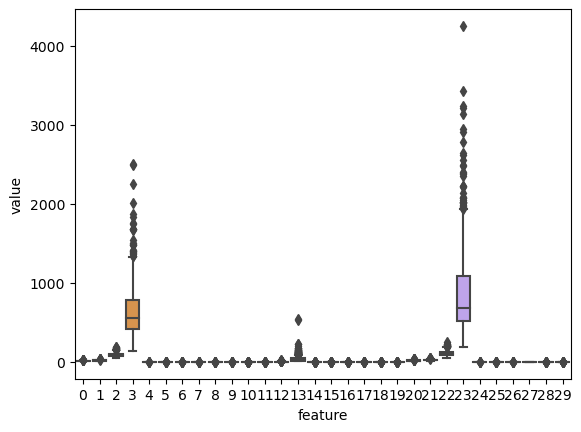

In [3]:
sns.boxplot(data=cancer.data)
plt.xlabel('feature')
plt.ylabel('value')
plt.show()

In [4]:
cancer.feature_names[[3,13,23]]

array(['mean area', 'area error', 'worst area'], dtype='<U23')

In [5]:
np.unique(cancer.target, return_counts=True)

(array([0, 1]), array([212, 357], dtype=int64))

In [6]:
212/357

0.5938375350140056

In [7]:
x = cancer.data
y = cancer.target

# 4-5. 로지스틱 회귀를 위한 뉴런을 만듭니다

![training_test_set](imgs/training_test_set.png "training_test_set")

#### 1. 테스트 세트보다 훈련 세트가 더 커야 합니다.
#### 2. 양성, 음성 클래스의 비율이 양 세트에서 균일해야 합니다.
> 학습이 잘못 되거나, 성능 측정이 잘못될 위험성 있음

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

- stratify : 해당 데이터의 subset 비율을 유지(여기서는 음성, 양성 클래스 비율)
- test_size : 테스트 세트의 크기

In [10]:
print(x_train.shape, x_test.shape)

(455, 30) (114, 30)


In [11]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([170, 285], dtype=int64))

In [12]:
170/285

0.5964912280701754

## 로지스틱 회귀 구현하기

In [13]:
class LogisticNeuron:
    def __init__(self):
        self.w = None
        self.b = None
        
    def forpass(self, x):
        z = np.sum(x * self.w) + self.b
        return z
    
    def backprop(self, x, err):
        w_grad = x * err
        b_grad = 1 * err
        return w_grad, b_grad
    
    def fit(self, x, y, epochs=100):
        self.w = np.ones(x.shape[1]) # x.shape[1] : feature 개수
        self.b = 0
        for i in range(epochs):
            for x_i, y_i in zip(x, y):
                z = self.forpass(x_i)
                a = self.activation(z)
                err = -(y_i - a)
                w_grad, b_grad = self.backprop(x_i, err)
                self.w -= w_grad
                self.b -= b_grad
    
    def activation(self, z): # z is an numpy array
        a = 1 / (1 + np.exp(-z))
        return a
    
    def predict(self, x):
        z = [self.forpass(x_i) for x_i in x]
        a = self.activation(np.array(z))
        return a > 0.5

- \_\_init\_\_: 가중치, 절편 미리 초기화 하지 않음
- forpass: $x \cdot w + b$ 구현
- activation: numpy array를 argument로 받으면 자동으로 function을 모든 element에 적용

In [14]:
neuron = LogisticNeuron()
neuron.fit(x_train, y_train)

C:\Users\skkuj\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


In [15]:
np.mean(neuron.predict(x_test) == y_test)

C:\Users\skkuj\Anaconda3\envs\ml\lib\site-packages\ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in exp


0.8245614035087719